In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### K-Means

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

blob_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8],
                         [-2.8,  2.8], [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
                  random_state=7) # y contains the cluster IDS, which we want to find with K-Means
k = 5
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
y_pred = kmeans.fit_predict(X)

In [ ]:
y_pred

array([4, 0, 1, ..., 2, 1, 0], dtype=int32)

In [ ]:
y_pred is kmeans.labels_

True

In [ ]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

In [ ]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2], dtype=int32)

In [ ]:
# Soft clustering
# kmeans.transform() returns the (Euclidean) distances of an instance to every centroid
kmeans.transform(X_new).round(2)

array([[2.81, 0.33, 2.9 , 1.49, 2.89],
       [5.81, 2.8 , 5.85, 4.48, 5.84],
       [1.21, 3.29, 0.29, 1.69, 1.71],
       [0.73, 3.22, 0.36, 1.55, 1.22]])

In [ ]:
# Provide initial centroids if you have an idea about them
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)

KMeans(init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       n_clusters=5, n_init=1, random_state=42)

In [ ]:
# The sum of the squared distances between the instances and their closest centroids
kmeans.inertia_

211.5985372581684

In [ ]:
kmeans.score(X)

-211.59853725816836

In [ ]:
# Mini-batch kmeans
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5, n_init=10, random_state=42)
minibatch_kmeans.fit(X)



MiniBatchKMeans(n_clusters=5, n_init=10, random_state=42)

In [ ]:
# Using the silhouette score for choosing the number of clusters
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_)

0.655517642572828

### Using Clustering for Image Segmentation

In [ ]:
# extra code – downloads the ladybug image

import urllib.request
from pathlib import Path

IMAGES_PATH = Path() / "images" / "unsupervised_learning"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)


homl3_root = "https://github.com/ageron/handson-ml3/raw/main/"
filename = "ladybug.png"
filepath = IMAGES_PATH / filename
if not filepath.is_file():
    print("Downloading", filename)
    url = f"{homl3_root}/images/unsupervised_learning/{filename}"
    urllib.request.urlretrieve(url, filepath)

In [ ]:
import PIL

image = np.asarray(PIL.Image.open(filepath))
image.shape

(533, 800, 3)

In [ ]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, n_init=10, random_state=42).fit(X)
# segmented_img replaces the color of each pixel with the mean color of its cluster
# by taking advantage of numpy's advanced indexing
segmented_img = kmeans.cluster_centers_[kmeans.labels_]


In [ ]:
kmeans.labels_.shape

(426400,)

In [ ]:
kmeans.labels_

array([1, 1, 1, ..., 4, 1, 1], dtype=int32)

In [ ]:
kmeans.cluster_centers_.shape

(8, 3)

In [ ]:
kmeans.cluster_centers_

array([[250.80339083, 238.65268971,   6.56603259],
       [  5.83448628,  28.22616668,   1.47552886],
       [ 55.88206518,  98.62346563,  14.79208777],
       [193.20797818,  54.13433345,  11.37470167],
       [ 25.47759236,  64.83281062,   4.31953567],
       [156.22887957, 160.67579389,  98.81396046],
       [ 94.89017515, 133.51803159,  40.11328915],
       [225.57151644, 185.02493849,   8.77650414]])

In [ ]:
# Reshape segmented_img to the original shape
segmented_img = segmented_img.reshape(image.shape)

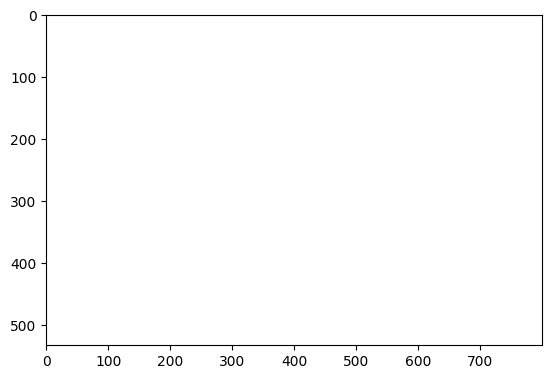

In [ ]:
plt.imshow(segmented_img)

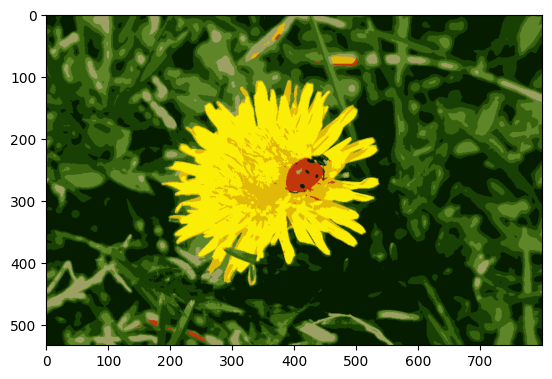

In [ ]:
plt.imshow(segmented_img / 255)

In [ ]:
segmented_img / 255

array([[[0.02288034, 0.11069085, 0.00578639],
        [0.02288034, 0.11069085, 0.00578639],
        [0.02288034, 0.11069085, 0.00578639],
        ...,
        [0.21914535, 0.38675869, 0.05800819],
        [0.21914535, 0.38675869, 0.05800819],
        [0.21914535, 0.38675869, 0.05800819]],

       [[0.02288034, 0.11069085, 0.00578639],
        [0.02288034, 0.11069085, 0.00578639],
        [0.02288034, 0.11069085, 0.00578639],
        ...,
        [0.21914535, 0.38675869, 0.05800819],
        [0.21914535, 0.38675869, 0.05800819],
        [0.21914535, 0.38675869, 0.05800819]],

       [[0.02288034, 0.11069085, 0.00578639],
        [0.02288034, 0.11069085, 0.00578639],
        [0.02288034, 0.11069085, 0.00578639],
        ...,
        [0.21914535, 0.38675869, 0.05800819],
        [0.21914535, 0.38675869, 0.05800819],
        [0.21914535, 0.38675869, 0.05800819]],

       ...,

       [[0.02288034, 0.11069085, 0.00578639],
        [0.02288034, 0.11069085, 0.00578639],
        [0.02288034, 0

### Using Clustering for Semi-Supervised Learning

In [ ]:
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)
X_train, y_train = X_digits[:1400], y_digits[:1400]
X_test, y_test = X_digits[1400:], y_digits[1400:]

In [ ]:
# Let's pretend we only have labels for 50 instances
from sklearn.linear_model import LogisticRegression

n_labeled = 50
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

LogisticRegression(max_iter=10000)

In [ ]:
# Measure the accuracy onthe test set (the test set must be labeled)
log_reg.score(X_test, y_test)

0.7481108312342569

In [ ]:
# It's the same as using the accuracy_score() function
from sklearn.metrics import accuracy_score

accuracy_score(y_test, log_reg.predict(X_test))

0.7481108312342569

In [ ]:
# Cluster the training set into 50(!) clusters
# Then, for each cluster, find the image closest to the centroid
k = 50
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

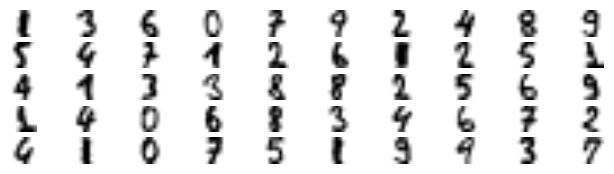

In [ ]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary",
               interpolation="bilinear")
    plt.axis('off')

# save_fig("representative_images_plot", tight_layout=False)
plt.show()

In [ ]:
# Manually label the representative digits
y_representative_digits = np.array([
    1, 3, 6, 0, 7, 9, 2, 4, 8, 9,
    5, 4, 7, 1, 2, 6, 1, 2, 5, 1,
    4, 1, 3, 3, 8, 8, 2, 5, 6, 9,
    1, 4, 0, 6, 8, 3, 4, 6, 7, 2,
    4, 1, 0, 7, 5, 1, 9, 9, 3, 7
])

In [ ]:
# Again, we only have 50 labeled instances, but instead of them being random,
# each of them is a representative image of its cluster
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.8488664987405542

In [ ]:
# Propagate the labels to all the other instances in the same cluster
y_train_propagated = np.empty(len(X_train), dtype=np.int64)
for i in range(k):
  y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

In [ ]:
kmeans.labels_

array([32, 41, 39, ..., 40, 40, 43], dtype=int32)

In [ ]:
kmeans.labels_.shape

(1400,)

In [ ]:
# 1400 True / False
kmeans.labels_ == 6

array([False, False, False, ..., False, False, False])

In [ ]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.8942065491183879

In [ ]:
# Ignore the 1% of instances that are farthest from their cluster center
# (i.e. eliminate outliers)
percentile_closest = 99

# The distance of each instance from its cluster center
X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]

for i in range(k):
  in_cluster = (kmeans.labels_ == i)
  # We consider only instances of cluster i
  cluster_dist = X_cluster_dist[in_cluster]
  cutoff_distance = np.percentile(cluster_dist, percentile_closest)
  above_cutoff = (X_cluster_dist > cutoff_distance)
  X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [ ]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.9093198992443325

In [ ]:
(y_train_partially_propagated == y_train[partially_propagated]).mean()

0.9755555555555555

In [ ]:
from sklearn.semi_supervised import LabelPropagation, LabelSpreading, SelfTrainingClassifier

### DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [ ]:
dbscan.labels_

array([ 0,  1,  2, -1,  3,  2, -1,  3,  2,  2,  2,  1,  3,  3,  0,  3,  0,
        3,  1,  2,  3,  2,  3,  2,  1,  0,  1,  3,  0,  3,  3,  1,  2,  2,
        3,  3,  2,  2,  1,  2,  2,  3,  3,  2,  2,  2,  2,  0,  2,  3, -1,
        2,  3,  3, -1,  3,  3,  2,  2,  2,  2,  1,  3,  0,  0,  3,  2,  0,
        1,  3,  2,  3,  1,  2,  2,  1,  1,  3,  3,  2,  2,  3,  2,  3,  0,
        3,  1,  3,  3,  2,  3,  3,  3,  1,  1,  0,  2,  3,  3,  0,  2,  3,
        1,  3, -1,  3,  1,  1,  0,  3,  0,  3,  3,  1,  2,  2,  3,  0,  2,
        3,  2,  0,  3,  0,  3,  1, -1,  2,  2,  3, -1,  0,  3,  3,  3,  0,
        0,  3,  2, -1,  1,  1,  3,  2,  2,  1,  1,  0,  0,  2,  0,  3,  2,
        1,  2,  3, -1,  3,  2,  2,  0,  2,  2,  3,  3,  3,  1,  2,  0,  1,
        0,  2,  1,  2,  2, -1,  0,  3,  3,  0,  1,  3,  1,  3,  2, -1,  3,
        2,  0, -1,  2,  1,  1,  2,  0,  2, -1, -1,  1,  0,  0,  3,  3,  3,
        1,  3,  0,  1,  2,  0,  0,  0,  0,  2,  1,  3,  2,  3,  2,  1,  2,
       -1,  2,  3,  2,  1

In [ ]:
dbscan.core_sample_indices_

array([  0,   1,   2,   4,   5,   8,   9,  10,  12,  13,  14,  15,  16,
        17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  30,
        31,  32,  33,  34,  35,  36,  37,  38,  39,  41,  42,  43,  44,
        45,  46,  47,  49,  51,  52,  53,  55,  56,  57,  60,  61,  62,
        63,  64,  65,  68,  69,  70,  71,  72,  74,  75,  76,  77,  79,
        80,  82,  84,  86,  87,  89,  90,  91,  92,  93,  94,  95,  96,
        98,  99, 100, 101, 102, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       127, 128, 129, 131, 132, 133, 134, 136, 137, 138, 140, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 157, 158,
       160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 171, 172, 173,
       174, 176, 178, 179, 180, 182, 183, 184, 186, 187, 188, 190, 191,
       193, 194, 195, 198, 199, 200, 201, 202, 204, 205, 206, 207, 208,
       209, 210, 212, 213, 215, 216, 217, 218, 219, 222, 223, 22

In [ ]:
dbscan.components_

array([[-0.69761836,  0.63443653],
       [ 1.96513498,  0.42124888],
       [-0.09293496,  1.01202565],
       ...,
       [ 0.88932961,  0.47728925],
       [ 1.32447107, -0.40464645],
       [-0.93253827,  0.1801946 ]])

In [ ]:
dbscan.components_.shape

(807, 2)

In [ ]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3])

In [ ]:
# If we widen the neighborhood we get just two clusters, which is correct
dbscan = DBSCAN(eps=0.20, min_samples=5)
dbscan.fit(X)
np.unique(dbscan.labels_)

array([0, 1])

In [ ]:
# DBSCAN does not have a predict() method, so we have to train a classifier ourselves
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
# We train on the core instances, but we could choose to train on all the instances
# or all but the anomalies (instances with label = -1)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [ ]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([0, 1, 0, 1])

In [ ]:
knn.predict_proba(X_new)

array([[0.82, 0.18],
       [0.  , 1.  ],
       [0.8 , 0.2 ],
       [0.  , 1.  ]])

In [ ]:
# Introduce a maximum distance and classify instances beyond that distance as anomalies

# We find the nearest neighbor of each new instance and assign its label to it
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]


In [ ]:
# We set any distance > 0.2 to -1 (anomaly)
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  1,  0, -1])

### Gaussian Mixture Models

In [ ]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [ ]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=42)

In [ ]:
# The probability that an instance is generated from each model
gm.weights_

array([0.39025715, 0.40007391, 0.20966893])

In [ ]:
# The mean of each model
gm.means_

array([[ 0.05131611,  0.07521837],
       [-1.40763156,  1.42708225],
       [ 3.39893794,  1.05928897]])

In [ ]:
gm.covariances_

array([[[ 0.68799922,  0.79606357],
        [ 0.79606357,  1.21236106]],

       [[ 0.63479409,  0.72970799],
        [ 0.72970799,  1.1610351 ]],

       [[ 1.14833585, -0.03256179],
        [-0.03256179,  0.95490931]]])

In [ ]:
gm.converged_

True

In [ ]:
gm.n_iter_

4

In [ ]:
# hard clustering
gm.predict(X)

array([0, 0, 1, ..., 2, 2, 2])

In [ ]:
# soft clustering
gm.predict_proba(X).round(3)

array([[0.977, 0.   , 0.023],
       [0.983, 0.001, 0.016],
       [0.   , 1.   , 0.   ],
       ...,
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ]])

In [ ]:
# Generative AI!
X_new, y_new = gm.sample(6)
X_new

array([[-0.86944074, -0.32767626],
       [ 0.29836051,  0.28297011],
       [-2.8014927 , -0.09047309],
       [ 3.98203732,  1.49951491],
       [ 3.81677148,  0.53095244],
       [ 2.84104923, -0.73858639]])

In [ ]:
y_new

array([0, 0, 1, 2, 2, 2])

In [ ]:
# Estimate the density of the model at any given location
# (Compute the exponential of these scores to get the pdf)
gm.score_samples(X).round(2)

array([-2.61, -3.57, -3.33, ..., -3.51, -4.4 , -3.81])

In [ ]:
np.exp(-2.61)

0.0735345437630571

### Using Gaussian Mixtures for Anomaly Detection

In [ ]:
# Use the second percentile lowest density as the threshold
# for anomaly detection(i.e., 2% of the instances will be considered anomalies)
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 2)
anomalies = X[densities < density_threshold]

### Selecting the number k of clusters (Gaussian Models)

In [ ]:
# Lower is better

print(gm.bic(X))
print(gm.aic(X))

8189.747000497186
8102.521720382148


In [ ]:
# BayesianGaussianMixture class eliminates unnecessary clusters
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)
bgm.weights_.round(2)

array([0.4 , 0.21, 0.4 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])